# <font size=14> Women and Child Health: Analysis of NFHS-4 Data </font>
National Family Health Survey, 4 (2015-2016) - India

- Data for this project has been taken from https://data.gov.in/
- Link to the dataset: https://data.gov.in/catalog/key-indicators-national-family-health-survey-nfhs
<br> </br>



# <font size=10> Data Analysis - Factors Affecting Child Stunting </font>



# 1. Correlation Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

#load normalised data 
df = pd.read_csv('./../Data/working_data/normalised_data_4.csv')
df.drop(df.columns[[0]], axis = 1, inplace = True) 

pd.set_option('display.max_columns', 30)
df.corr()['68. Children under 5 years who are stunted11 (%)']

1. Population (female) age 6+ years who ever attended school (%)                                -0.566271
4. Sex ratio at birth for children born in the last five years (females per 1000 males)          0.005767
7. Households with an improved drinking-water source1 (%)                                        0.052590
8. Households using improved sanitation facility2 (%)                                           -0.604744
9. Households using clean fuel for cooking3 (%)                                                 -0.503887
10. Households using iodized salt (%)                                                           -0.194212
12. Women who are literate (%)                                                                  -0.648904
13. Men who are literate (%)                                                                    -0.501516
14. Women with 10 or more years of schooling (%)                                                -0.569276
15. Women age 20-24 years married before age 1

In [12]:
df

,District,1. Population (female) age 6+ years who ever attended school (%),4. Sex ratio at birth for children born in the last five years (females per 1000 males),7. Households with an improved drinking-water source1 (%),8. Households using improved sanitation facility2 (%),9. Households using clean fuel for cooking3 (%),10. Households using iodized salt (%),12. Women who are literate (%),13. Men who are literate (%),14. Women with 10 or more years of schooling (%),15. Women age 20-24 years married before age 18 years (%),19. Any modern method (%),25. Total unmet need (%),30. Mothers who had at least 4 antenatal care visits (%),32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%),...,53. Children age 9-59 months who received a vitamin A dose in last 6 months (%),62. Children under age 3 years breastfed within one hour of birth8 (%),65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%),67. Total children age 6-23 months receiving an adequate diet9 10 (%),68. Children under 5 years who are stunted11 (%),72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%),73. Men whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%),74. Women who are overweight or obese (BMI >=25.0 kg/m2) (%),75. Men who are overweight or obese (BMI >=25.0 kg/m2) (%),76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%),79. All women age 15-49 years who are anaemic (%),80. Men age 15-49 years who are anaemic (<13.0 g/dl) (%),State,Region,Zone
0,Srikakulam,-1.027700,-0.528802,-0.915598,-0.705917,0.001458,-2.394772,-0.634679,-0.798898,0.009967,-0.035834,1.495074,-1.131856,0.932237,1.928804,...,1.727709,-1.004865,-0.669256,-0.816652,-0.922890,-0.067378,-0.184924,0.453209,-0.311178,1.011736,1.588169,0.473650,AP,Rural,Southern Zone
1,Vizianagaram,-1.253004,-0.112195,0.352274,-1.028720,0.116194,-4.390536,-1.039567,-2.112033,-0.172335,0.330585,1.572391,-1.611588,0.748199,1.133238,...,0.917788,-0.234050,-0.333972,-0.135969,0.454355,0.658967,0.524099,-0.079725,1.429084,1.495927,1.995139,2.099764,AP,Rural,Southern Zone
2,East Godavari,-0.209930,0.296399,-0.388505,0.242319,0.205831,-2.423283,0.067550,-0.600886,-0.185356,0.833513,1.732971,-1.806479,1.022299,1.585512,...,1.143684,-0.308277,-0.527405,-0.682947,-0.764358,-0.534314,-0.565892,1.646980,1.060952,0.564318,1.380844,2.308971,AP,Rural,Southern Zone
3,West Godavari,0.173921,-1.410085,-1.008195,0.464246,0.811781,-1.582211,0.143467,-2.164141,0.237845,0.553310,1.911393,-1.566613,0.853923,0.697311,...,0.769027,-0.770766,-0.695047,-0.853118,-1.051697,-0.731465,-0.417738,2.147937,2.711969,-0.060841,0.797264,-0.448765,AP,Rural,Southern Zone
4,Prakasam,-1.403207,-1.305933,-1.998276,0.222143,1.091450,-2.822436,-0.862428,-1.632635,-0.361147,1.508875,1.655654,-1.536630,0.975310,1.280363,...,0.664343,-0.850702,-0.101853,0.192217,-0.952615,-0.565443,-0.830452,1.337878,2.187660,0.080126,0.636011,0.492669,AP,Rural,Southern Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Haora,1.083481,-0.240382,0.865121,0.504597,-0.152719,0.114187,0.662230,0.013994,-0.217910,0.503018,0.793280,-0.817032,1.699715,0.648269,...,1.534870,-0.353955,0.787938,0.520404,-0.586010,-0.378669,-0.449485,0.410574,-0.400422,-0.630839,0.666726,0.882556,WB,Rural,Eastern Zone
650,Kolkata,1.325475,0.713006,0.615821,0.246354,1.363948,0.627384,0.953244,0.045260,1.207951,-0.897998,0.781386,-1.161839,1.409953,0.724556,...,0.300705,0.211309,0.336595,0.459628,-1.309311,-1.665337,-0.354243,2.552967,3.080102,0.840123,-0.362218,0.121801,WB,Urban,Eastern Zone
651,South Twenty Four Parganas,0.649563,1.097566,0.779647,0.242319,-0.762254,0.000144,0.453460,-1.038598,-0.849456,2.047727,0.953860,-1.086881,0.959647,-0.446998,...,1.154703,0.656669,1.974327,1.675134,-0.803991,-0.316411,0.005560,0.186742,-0.668155,0.564318,1.273342,0.825499,WB,Rural,Eastern Zone
652,Paschim Medinipur,0.566117,-0.5047

In [13]:
attributes_stunting = ['1. Population (female) age 6+ years who ever attended school (%)' , 
                       '3. Sex ratio of the total population (females per 1000 males)' , 
                       '7. Households with an improved drinking-water source1 (%)' , 
 '8. Households using improved sanitation facility2 (%)' , 
 '9. Households using clean fuel for cooking3 (%)' ,
 '12. Women who are literate (%)',
 '13. Men who are literate (%)' , 
 '62. Children under age 3 years breastfed within one hour of birth8 (%)',
 '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
 '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
 '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
 '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
 '79. All women age 15-49 years who are anaemic (%)',
 '14. Women with 10 or more years of schooling (%)',
 '15. Women age 20-24 years married before age 18 years (%)',
 '19. Any modern method (%)',
 '30. Mothers who had at least 4 antenatal care visits (%)',
 '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
 '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
'68. Children under 5 years who are stunted11 (%)'
 ]

attributes_stunting = df.columns

In [14]:
len(attributes_stunting)

32

**It can be observed that women literacy rates, education/schooling of females,  mother's BMI , improved sanitation facilities, clean fuel, men literacy rates, breastfeeding practises, antenatal care, contraceptive awareness are correlated with stunting in children**

# 2. DATA ANALYSIS TECHNIQUE: Regression Analysis

To determine risk factors for stunting, all the independent variables will be entered into the regression equation first and a full regression model  with  these variables will be developed. The  p-value was observed for each attribute. Then, a new regression model with all variables with p-values less than a suitable threshold shall be developed. The remaining variables will be discarded. This will be performed recursively until all final variables were significant (p-value < 0.05). We will use the stat models library in Python to perform this analysis

In [15]:
#importing stat models
import statsmodels.api as sm
#loading the dataset

# df = df[attributes_stunting]

In [16]:
df

,District,1. Population (female) age 6+ years who ever attended school (%),4. Sex ratio at birth for children born in the last five years (females per 1000 males),7. Households with an improved drinking-water source1 (%),8. Households using improved sanitation facility2 (%),9. Households using clean fuel for cooking3 (%),10. Households using iodized salt (%),12. Women who are literate (%),13. Men who are literate (%),14. Women with 10 or more years of schooling (%),15. Women age 20-24 years married before age 18 years (%),19. Any modern method (%),25. Total unmet need (%),30. Mothers who had at least 4 antenatal care visits (%),32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%),...,53. Children age 9-59 months who received a vitamin A dose in last 6 months (%),62. Children under age 3 years breastfed within one hour of birth8 (%),65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%),67. Total children age 6-23 months receiving an adequate diet9 10 (%),68. Children under 5 years who are stunted11 (%),72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%),73. Men whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%),74. Women who are overweight or obese (BMI >=25.0 kg/m2) (%),75. Men who are overweight or obese (BMI >=25.0 kg/m2) (%),76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%),79. All women age 15-49 years who are anaemic (%),80. Men age 15-49 years who are anaemic (<13.0 g/dl) (%),State,Region,Zone
0,Srikakulam,-1.027700,-0.528802,-0.915598,-0.705917,0.001458,-2.394772,-0.634679,-0.798898,0.009967,-0.035834,1.495074,-1.131856,0.932237,1.928804,...,1.727709,-1.004865,-0.669256,-0.816652,-0.922890,-0.067378,-0.184924,0.453209,-0.311178,1.011736,1.588169,0.473650,AP,Rural,Southern Zone
1,Vizianagaram,-1.253004,-0.112195,0.352274,-1.028720,0.116194,-4.390536,-1.039567,-2.112033,-0.172335,0.330585,1.572391,-1.611588,0.748199,1.133238,...,0.917788,-0.234050,-0.333972,-0.135969,0.454355,0.658967,0.524099,-0.079725,1.429084,1.495927,1.995139,2.099764,AP,Rural,Southern Zone
2,East Godavari,-0.209930,0.296399,-0.388505,0.242319,0.205831,-2.423283,0.067550,-0.600886,-0.185356,0.833513,1.732971,-1.806479,1.022299,1.585512,...,1.143684,-0.308277,-0.527405,-0.682947,-0.764358,-0.534314,-0.565892,1.646980,1.060952,0.564318,1.380844,2.308971,AP,Rural,Southern Zone
3,West Godavari,0.173921,-1.410085,-1.008195,0.464246,0.811781,-1.582211,0.143467,-2.164141,0.237845,0.553310,1.911393,-1.566613,0.853923,0.697311,...,0.769027,-0.770766,-0.695047,-0.853118,-1.051697,-0.731465,-0.417738,2.147937,2.711969,-0.060841,0.797264,-0.448765,AP,Rural,Southern Zone
4,Prakasam,-1.403207,-1.305933,-1.998276,0.222143,1.091450,-2.822436,-0.862428,-1.632635,-0.361147,1.508875,1.655654,-1.536630,0.975310,1.280363,...,0.664343,-0.850702,-0.101853,0.192217,-0.952615,-0.565443,-0.830452,1.337878,2.187660,0.080126,0.636011,0.492669,AP,Rural,Southern Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Haora,1.083481,-0.240382,0.865121,0.504597,-0.152719,0.114187,0.662230,0.013994,-0.217910,0.503018,0.793280,-0.817032,1.699715,0.648269,...,1.534870,-0.353955,0.787938,0.520404,-0.586010,-0.378669,-0.449485,0.410574,-0.400422,-0.630839,0.666726,0.882556,WB,Rural,Eastern Zone
650,Kolkata,1.325475,0.713006,0.615821,0.246354,1.363948,0.627384,0.953244,0.045260,1.207951,-0.897998,0.781386,-1.161839,1.409953,0.724556,...,0.300705,0.211309,0.336595,0.459628,-1.309311,-1.665337,-0.354243,2.552967,3.080102,0.840123,-0.362218,0.121801,WB,Urban,Eastern Zone
651,South Twenty Four Parganas,0.649563,1.097566,0.779647,0.242319,-0.762254,0.000144,0.453460,-1.038598,-0.849456,2.047727,0.953860,-1.086881,0.959647,-0.446998,...,1.154703,0.656669,1.974327,1.675134,-0.803991,-0.316411,0.005560,0.186742,-0.668155,0.564318,1.273342,0.825499,WB,Rural,Eastern Zone
652,Paschim Medinipur,0.566117,-0.5047

In [17]:
X = df.copy(deep='True')
# X: independent variable
X = X.drop(columns = ['68. Children under 5 years who are stunted11 (%)'])
Xcpy = X.copy(deep= 'True')
#y: dependent variable
y = df['68. Children under 5 years who are stunted11 (%)']

#convert to numpy
y=y.values
X=X.values

## 2.1 Full Regression Model (All variables)

In [18]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**It can be observed that variables x7,x8,x9,x14,x18,x19 have p-values higher than 0.05(=threshold)**

In [21]:
#drop insignificant variables
Xcpy.drop(Xcpy.columns[[6,7,8,13,17,18]], axis = 1, inplace = True) 


### Variables that still remain:

In [22]:

Xcpy.columns

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
       '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Wome

In [23]:
len(Xcpy.columns)

25

In [24]:
X = Xcpy.copy(deep= 'True')
X=X.values

## 2.2 Second Regression Model (Selected variables)

In [25]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

**In this model, no variable has a p-vlaue > 0.05. So we stop here. The variables that remain are:** 

In [26]:

Xcpy.columns

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
       '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
       '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
       '72. Wome

In [27]:
len(Xcpy.columns)

25

** From the coefficients of regression ('coef'), it can be observed that the following variables are positively related to increased child stunting: x1,x3,x8,x9,x11
- 1. Population (female) age 6+ years who ever attended school (%)
- 7. Households with an improved drinking-water source1 (%)
- 72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)
- 79. All women age 15-49 years who are anaemic (%)
<br> 

The following are negatively related to increased child stunting: x2,x4,x5,x6,x7,x10,x12,x13

- '3. Sex ratio of the total population (females per 1000 males)'
- 8. Households using improved sanitation facility2 (%)'
- '9. Households using clean fuel for cooking3 (%)'
- '12. Women who are literate (%)'
- '67. Total children age 6-23 months receiving an adequate diet9 10 (%)'

However, these results might be biased due to problems of multicollinearity,which is common in multivariate regression.
The effect of these variables will be further studied using clustering analysis and association rule mining.

On the basis of a literature review, a few other, interesting variables have been added to this list of variables so that their effect on child stunting can also be studied. They are:

- '13. Men who are literate (%)'
- '62. Children under age 3 years breastfed within one hour of birth8 (%)'
- '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',








In [28]:
len(attributes_stunting)

32

**Total number of attributes: 18**

# 2. Clustering Analysis to identify factors that affect child stunting

## 2.1 K-Means Clustering Implementation

In [29]:


#function to assign clusters
def AssignClusters(df,centroids):
  assigned_clusters={}
  N = df.shape[0]
  k = len(centroids.keys())
  for i in range(N):
    distances={}
    for j in range(k):
      distances[j+1]=np.linalg.norm(df.iloc[i].to_numpy()-centroids[j+1])
    minval = min(distances.values())
    res = [k for k, v in distances.items() if v==minval]
    assigned_clusters[i]=res[0]
    distances.clear()

  return assigned_clusters

def centeroidnp(arr):
    length, dim = arr.shape
    return np.array([np.sum(arr[:, i])/length for i in range(dim)])

#function to update centroids
def update(df,l,assigned_clusters):

  N = len(assigned_clusters.keys())
  k = len(l.keys())
  for j in range(k):
    datapoints=[]
    for i in range(N):
      if(assigned_clusters[i]==j+1):
        datapoints.append(df.iloc[i].tolist())
    datapointsArray = np.asarray(datapoints)
    
    l[j+1]=centeroidnp(datapointsArray).tolist()

  return l

#Function to perform K means clustering on the data frame df and the desired number of clusters = num_clusters
def KMeansClustering(df, num_clusters):
    #N is the number of samples
    #D is the number of features
    N, D = df.shape
    
    np.random.seed(450)
    k = num_clusters

    
    # centroids[i] = [x1,x2,x3 . .. . .. . xD]
    centroids = {
    
        i+1 : df.iloc[np.random.randint(0,N)].tolist()
        for i in range(k)

    }
    #centroids contains K randomly selected data points 
  

    #Assign clusters to each data point.
    assigned_clusters=AssignClusters(df,centroids)
 
    #Update Centroids
    centroids=update(df,centroids,assigned_clusters)
    
    #Repeating assignment stage...
    assigned_clusters=AssignClusters(df,centroids)
    
    itr = 0
    while True:
      clusters=assigned_clusters.copy()
    
      centroids = update(df,centroids,assigned_clusters)
        
      assigned_clusters = AssignClusters(df, centroids)
 
      if(clusters==assigned_clusters or itr==1000):
        break
        
      itr+=1

    return list(clusters.values()), list(centroids.values())

## 2.2 Loading the required dataframes

In [30]:
#since dataframe df contained the normalised data, we will load the same into df_normalised. The input for k-means clustering should be normalised
df_normalised = df
df_normalised.columns
df_normalised.shape


(654, 32)

In [31]:
#load discrete values in df_discrete
df_discrete = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_6.csv')
df_discrete.drop(df_discrete.columns[[0]], axis = 1, inplace = True) 
stunting_discrete = df_discrete['68. Children under 5 years who are stunted11 (%)'].tolist()


## 2.3 Clustering on the basis of sanitation facilities in household

In [32]:

df_cluster_1 = df_normalised[['8. Households using improved sanitation facility2 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
print(cluster_centers)


[[0.2315439551290202], [-0.9523592818711585], [1.303623240467974]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, low and high % households having improved sanitation facilities**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)

In [34]:
dfC0 = df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1.loc[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C2")
print(l)
print(m)
print(h)

l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C3")
print(l)
print(m)
print(h)

C1
0.42162162162162165
0.3945945945945946
0.1837837837837838
C2
0.08620689655172414
0.32413793103448274
0.5896551724137931
C3
0.6424581005586593
0.2849162011173184
0.07262569832402235


It is clear of all the districts that belong to cluster 2 (corresponding to low % of households having improved santitation facilities ), 62.7% have 'high' stunting rates, and ONLY 7.5% have 'low' stunting rates. On the other hand, of all the districts that belong to  cluster 1,(corresponding to high % of households having improved santitation facilities), 65.3% have 'low' stunting rates and ONLY 6.2% have 'high' % of children that are stunted .

**We can therefore conclude that children with access to improved sanitation facilities are at lower risk of stunting**


In [35]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']


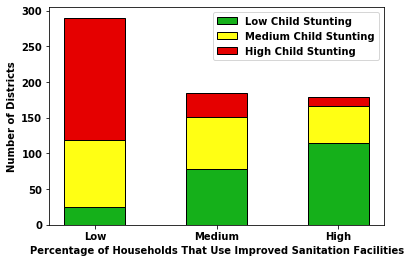

In [36]:
# Stacked bar plot
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium','Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:green', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:yellow', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:red', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Improved Sanitation Facilities", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved sanitation facilities",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot1.png')
# Show graphic
plt.show()


## 2.4 Clustering on the basis of drinking water source in household

In [34]:

df_cluster_1 = df_normalised[['7. Households with an improved drinking-water source1 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [35]:
print(cluster_centers)


[[0.5706807364560821], [-0.6578324063046875], [-2.4962665176423315]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having high, medium and low % households having improved water sources**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [36]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.3433179723502304
0.30414746543778803
0.35253456221198154
C1
0.29878048780487804
0.36585365853658536
0.3353658536585366
C2
0.35714285714285715
0.4642857142857143
0.17857142857142858


Of all the districts that belong to cluster 1 (corresponding to low % of households having acces to improved drinking water sources), 37.8% have 'low' stunting rates, and 16.8 have 'high' stunting rates. Additionally, of all the districts that belong to  cluster 2,(corresponding to high % of households having acces to improved drinking water sources), 34.7% have 'low' stunting rates and 35.71% have 'high' % of children that are stunted .

**Thus, there is no evidence of any sort of a relationship between improved drinking water sources and child stunting**

<br>

**Children with access to improved sanitation but not improved water are at lower risk of stunting compared to children without access**


In [37]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

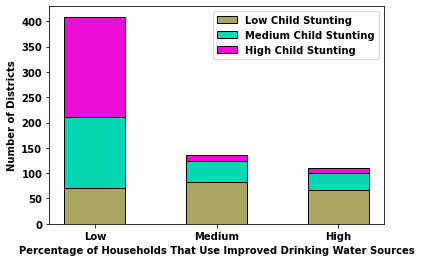

In [45]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [2,1,0]
 
# Names of group and bar width
names = ['High','Medium','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Improved Drinking Water Sources", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot3.png')
# Show graphic
plt.show()








## 2.5 Clustering on the basis of clean fuel use in household

In [39]:

df_cluster_1 = df_normalised[['9. Households using clean fuel for cooking3 (%)'] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
print(cluster_centers)


[[1.879350233930364], [0.4749509044452592], [-0.6622173541135683]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having high, medium and low % households using clean fuel for cooking**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)

In [41]:
dfC0 = df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1.loc[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)

l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.6
0.3181818181818182
0.08181818181818182
C1
0.6074074074074074
0.3111111111111111
0.08148148148148149
C2
0.17114914425427874
0.34474327628361856
0.4841075794621027


It is clear of all the districts that belong to cluster 0 (corresponding to low % of households using clean fuel ), 50% have 'high' stunting rates, and 14.5% have 'low' stunting rates. On the other hand, of all the districts that belong to  cluster 1,(corresponding to high % of households using clean fuel use), 67.4% have 'low' stunting rates and ONLY 7.2% have 'high' % of children that are stunted .

**We can therefore conclude that clean fuel use in household can prevent stunting**


In [42]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

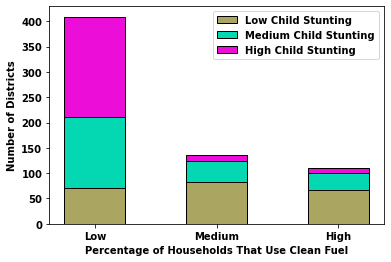

In [44]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [2,1,0]
 
# Names of group and bar width
names = ['High','Medium','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Households That Use Clean Fuel", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nclean fuel",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot5.png')
# Show graphic
plt.show()







## 2.6 clustering on the basis of breastfeeding practises

In [46]:

df_cluster_1 = df_normalised[['62. Children under age 3 years breastfed within one hour of birth8 (%)']]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
print(cluster_centers)


[[0.07784873849916844], [-1.0108647388496759], [1.371421108948945]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium , low and high % of children breastfed within an hour of birth**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [48]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.4262295081967213
0.30327868852459017
0.27049180327868855
C1
0.18032786885245902
0.35655737704918034
0.46311475409836067
C2
0.42168674698795183
0.3433734939759036
0.23493975903614459


**It is clear of all the points that belong to cluster 1 (corresponding to low % of children breastfed within an hour of birth), 47% have 'high' stunting rates. On the other hand, of all the points that belong to  cluster 2,(corresponding to low % of children breastfed within an hour of birth), 44% have 'low' stunting rates.**

**We can therefore conclude that early initiation to breastfeeding can prevent stunting in children.**



In [49]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

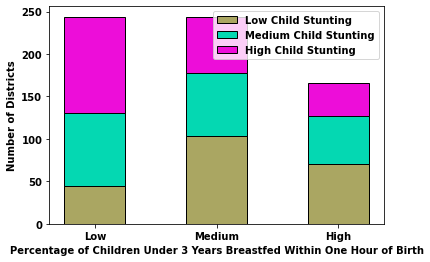

In [50]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium','Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Under 3 Years Breastfed Within One Hour of Birth", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households where \nchildren were breastfed \nwithin an hour of birth",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot7.png')
# Show graphic
plt.show()




## 2.7 clustering on the basis of women literacy


In [51]:

df_cluster_1 = df_normalised[['12. Women who are literate (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
print(cluster_centers)


[[0.00979602257944795], [-1.2300635072612256], [1.1187783582570165]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, low and high % of women literacy**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [53]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.26693227091633465
0.4262948207171315
0.30677290836653387
C1
0.046632124352331605
0.29533678756476683
0.6580310880829016
C2
0.6761904761904762
0.2571428571428571
0.06666666666666667


**It is clear of all the points that belong to cluster 0 (corresponding to 'low' % literacy and education levels 0f women),70.09% have 'high' stunting rates, and ONLY 3.6% have 'low' stunting rates. On the other hand, of all the points that belong to  cluster 1,(corresponding to 'high' % of literacy and education levels), 67.1% have 'low' stunting rates and ONLY 7.3% have 'high' stunting rates.**

**We can therefore conclude that there is a strong association between literacy and education levels of women and child stunting**



In [54]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

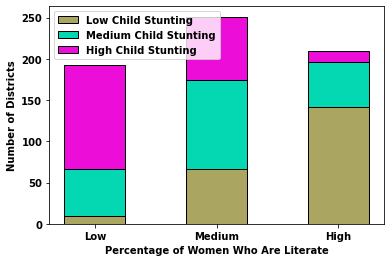

In [55]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium','Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Who Are Literate", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of women who are literate",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot9.png') 
# Show graphic
plt.show()


## 2.8.1 Clustering on the basis of Women BMI 

In [56]:

df_cluster_1 = df_normalised[['72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [57]:
print(cluster_centers)


[[-0.07356764659109466], [1.0965485657597636], [-1.183584172202364]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, high and low % of women having below normal BMI**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [58]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.33624454148471616
0.38427947598253276
0.2794759825327511
C1
0.039473684210526314
0.34210526315789475
0.618421052631579
C2
0.6700507614213198
0.2639593908629442
0.06598984771573604


**It is clear of all the points that belong to cluster 0 (corresponding to 'high' % of women having below normal BMI ), 64% have 'high' stunting rates, and ONLY 3.8% have 'low' stunting rates. On the other hand, of all the points that belong to cluster 1 (corresponding to 'low' % of women having below normal BMI ), 67.8% have 'low' stunting rates, and ONLY 5.7% have 'high' stunting rates. 
**We can therefore conclude that there is a strong association between mother's nutritional health (BMI) and stunting in children**



In [59]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

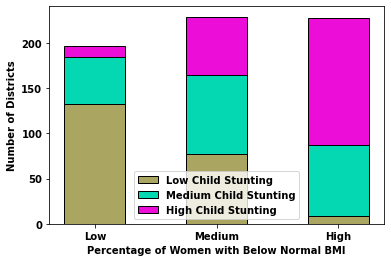

In [60]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,2,0]
 
# Names of group and bar width
names = ['Medium','High','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women with Below Normal BMI", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of women who are literate",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot11.png')
# Show graphic
plt.show()




## 2.8.2 Clustering on the basis of Men BMI 

In [93]:

df_cluster_1 = df_normalised[['73. Men whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [94]:
print(cluster_centers)


[[0.09035438608512539], [1.3380095326473371], [-1.0955694581471582]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, high and low % of women having below normal BMI**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [95]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)



C0
0.30851063829787234
0.3333333333333333
0.35815602836879434
C1
0.025477707006369428
0.37579617834394907
0.5987261146496815
C2
0.5906976744186047
0.3023255813953488
0.10697674418604651


**It is clear of all the points that belong to cluster 0 (corresponding to 'high' % of women having below normal BMI ), 64% have 'high' stunting rates, and ONLY 3.8% have 'low' stunting rates. On the other hand, of all the points that belong to cluster 1 (corresponding to 'low' % of women having below normal BMI ), 67.8% have 'low' stunting rates, and ONLY 5.7% have 'high' stunting rates. 
**We can therefore conclude that there is a strong association between mother's nutritional health (BMI) and stunting in children**



In [96]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

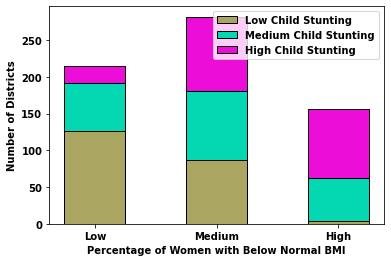

In [97]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,2,0]
 
# Names of group and bar width
names = ['Medium','High','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women with Below Normal BMI", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of women who are literate",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot11.png')
# Show graphic
plt.show()




## 2.9 Clustering on the basis of % of Women who consumed iron folic acid during pregnancy

In [61]:

df_cluster_1 = df_normalised[['32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
print(cluster_centers)


[[1.4925154670758374], [-0.8643491222925594], [0.31226729504623735]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having high, low and medium % of women who consumed iron folic acid during pregnancy**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [63]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0


l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.6642857142857143
0.21428571428571427
0.12142857142857143
C1
0.1592356687898089
0.34394904458598724
0.4968152866242038
C2
0.375
0.4
0.225


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of women who consumed iron folic acid during pregnancy ), 69.01% have 'low' stunting rates, and ONLY 8.62% have 'high' stunting rates. 
**We can therefore conclude that there is a strong association between mother's nutritional health during pregnancy and stunting in children**



In [64]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

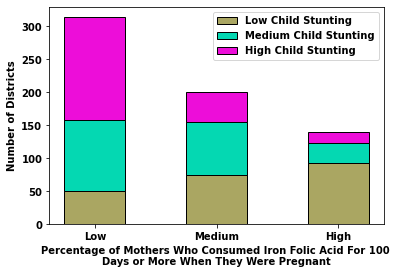

In [65]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [2,0,1]
 
# Names of group and bar width
names = [ 'High','Low', 'Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Mothers Who Consumed Iron Folic Acid For 100 \nDays or More When They Were Pregnant", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot13.png', bbox_inches='tight') 
# Show graphic
plt.show()






## 2.10.1 Clustering on the basis of % of Women who are anaemic

In [66]:

df_cluster_1 = df_normalised[['79. All women age 15-49 years who are anaemic (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
print(cluster_centers)


[[0.044326134824687176], [1.112137508125992], [-1.2749179914088244]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium, high, low % of women who are anemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [68]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.31316725978647686
0.3309608540925267
0.35587188612099646
C1
0.23195876288659795
0.30927835051546393
0.4587628865979381
C2
0.4748603351955307
0.36312849162011174
0.16201117318435754


**It is clear of all the points that belong to cluster 2 (corresponding to 'low' % of women who are anaemic), 48.6% have 'low' stunting rates, and 15.5% have 'high' stunting rates. 
**We can therefore conclude that anemia in women is not as indicative of stunting in children as other factors like sanitation.**



In [69]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

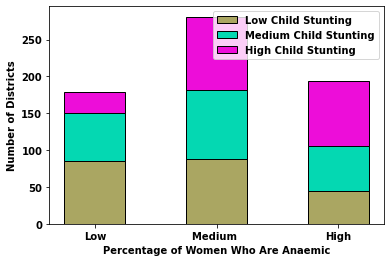

In [70]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,2,0]
 
# Names of group and bar width
names = ['Medium ','High','Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15.png') 
# Show graphic
plt.show()





## 2.10.2 Clustering on the basis of % of Men who are anaemic

In [98]:

df_cluster_1 = df_normalised[['80. Men age 15-49 years who are anaemic (<13.0 g/dl) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [99]:
print(cluster_centers)


[[-0.9769544663969024], [1.6008857270830736], [0.16844290601501802]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, high, medium % of men who are anemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [100]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)



C0
0.49795918367346936
0.31020408163265306
0.19183673469387755
C1
0.16806722689075632
0.31092436974789917
0.5210084033613446
C2
0.2620689655172414
0.3620689655172414
0.3758620689655172


**It is clear of all the points that belong to cluster 2 (corresponding to 'low' % of women who are anaemic), 48.6% have 'low' stunting rates, and 15.5% have 'high' stunting rates. 
**We can therefore conclude that anemia in women is not as indicative of stunting in children as other factors like sanitation.**



In [101]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

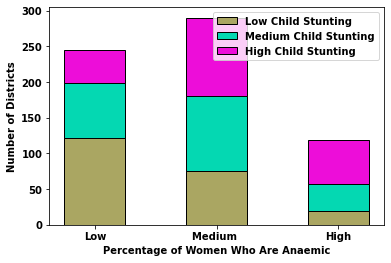

In [102]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High','Medium ']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15.png') 
# Show graphic
plt.show()





## 2.11 Clustering on the basis of 15. Women age 20-24 years married before age 18 years (%)

In [71]:

df_cluster_1 = df_normalised[['15. Women age 20-24 years married before age 18 years (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [72]:
print(cluster_centers)


[[-0.9875953619437357], [1.4010581182743136], [0.12320717381718702]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, high and medium % of women who were married before 18 years**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [73]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.5515873015873016
0.30952380952380953
0.1388888888888889
C1
0.07051282051282051
0.34615384615384615
0.5833333333333334
C2
0.2764227642276423
0.34959349593495936
0.37398373983739835


**It is clear of all the points that belong to cluster 0 (corresponding to 'high' % of women who were married before age 18, 60.27% have 'high' stunting rates, and only 6.84% have 'low' stunting rates. Of all the districts belonging to cluster 1 (corresponding to 'low' % of women who were married before age 18, 56.4% have low stunting rates and only 13.8% have high stunting rates.
**We can therefore conclude that anemia in women is not as indicative of stunting in children as other factors like sanitation.**



In [74]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

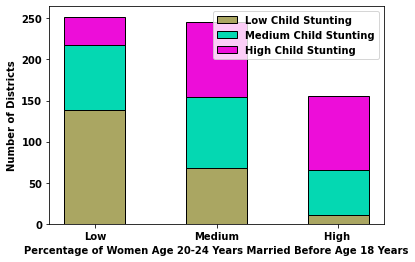

In [75]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High ','Medium']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Women Age 20-24 Years Married Before Age 18 Years", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_1.png') 
# Show graphic
plt.show()



## 2.12 Clustering on the basis of 13. Men who are literate (%)

In [76]:

df_cluster_1 = df_normalised[['13. Men who are literate (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [77]:
print(cluster_centers)


[[-0.324844057845622], [-1.8067244236220306], [0.8493117161932756]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having medium,low and high % of men who are literate**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [78]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.24452554744525548
0.3467153284671533
0.40875912408759124
C1
0.09090909090909091
0.2727272727272727
0.6363636363636364
C2
0.4897260273972603
0.339041095890411
0.17123287671232876


**It is clear of all the points that belong to cluster 0 (corresponding to 'low' % of men who are literate, 67.08% have 'high' stunting rates, and only 9.3% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of men who are literate , only 16.6% have high stunting rates
**We can therefore conclude that anemia in women is not as indicative of stunting in children as other factors like sanitation.**



In [79]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

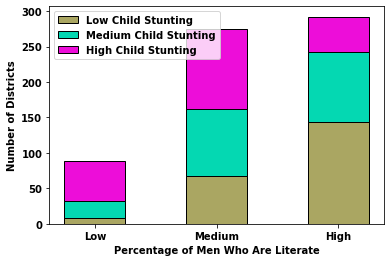

In [80]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium', 'Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Men Who Are Literate", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_2.png') 
# Show graphic
plt.show()







## 2.12 Clustering on the basis of 67. Total children age 6-23 months receiving an adequate diet9 10 (%)

In [81]:

df_cluster_1 = df_normalised[['67. Total children age 6-23 months receiving an adequate diet9 10 (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [82]:
print(cluster_centers)


[[-0.6408635752617038], [0.36730807194660886], [2.253815646330191]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, medium and high % of children receiving an adequate diet**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [83]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.19571045576407506
0.353887399463807
0.450402144772118
C1
0.4354066985645933
0.3444976076555024
0.22009569377990432
C2
0.75
0.19444444444444445
0.05555555555555555


**It is clear of all the points that belong to cluster 0 (corresponding to 'high' % of children receiving an adequate diet, 75.52% have 'low' stunting rates, and only 5.59% have 'high' stunting rates. Of all the districts belonging to cluster 1(corresponding to 'low' % of children receiving an adequate diet , 19.84% have low stunting rates and 44.3% have high stunting rates.




In [84]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

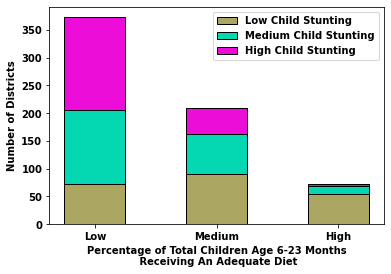

In [86]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['Low','Medium','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Total Children Age 6-23 Months\n Receiving An Adequate Diet", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_3.png', bbox_inches='tight') 
# Show graphic
plt.show()








## 2.12 Clustering on the basis of 76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)

In [87]:
print(df_normalised.columns)
df_cluster_1 = df_normalised[['76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [88]:
print(cluster_centers)


[[0.8931854760474358], [-0.24080645597825137], [-1.5770990238616809]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having high, medium and low% of children who are anaemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [89]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.17543859649122806
0.3473684210526316
0.47719298245614034
C1
0.4163265306122449
0.3183673469387755
0.2653061224489796
C2
0.532258064516129
0.33064516129032256
0.13709677419354838


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of children receiving an adequate diet, 48.51% have 'high' stunting rates, and 16.92% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of children who are anaemic , 51.70% have low stunting rates and 12.82% have high stunting rates.




In [90]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

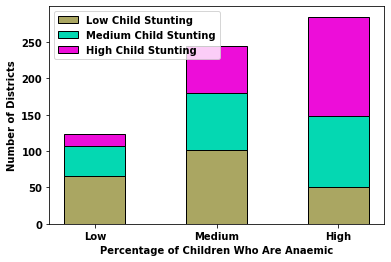

In [91]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [2,1,0]
 
# Names of group and bar width
names = ['High','Medium', 'Low']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_4.png', bbox_inches='tight') 
# Show graphic
plt.show()





In [92]:
df.columns

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%

## 2.13 Clustering on the basis of 4. Sex ratio at birth for children born in the last five years (females per 1000 males)

In [103]:
print(df_normalised.columns)
df_cluster_1 = df_normalised[['4. Sex ratio at birth for children born in the last five years (females per 1000 males)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [104]:
print(cluster_centers)


[[-1.1012394267337222], [1.3345431404536428], [0.012657535779687942]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, high, medium % of children who are anaemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [105]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.42328042328042326
0.30158730158730157
0.2751322751322751
C1
0.37254901960784315
0.35947712418300654
0.2679738562091503
C2
0.25961538461538464
0.33974358974358976
0.40064102564102566


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of children receiving an adequate diet, 48.51% have 'high' stunting rates, and 16.92% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of children who are anaemic , 51.70% have low stunting rates and 12.82% have high stunting rates.




In [106]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

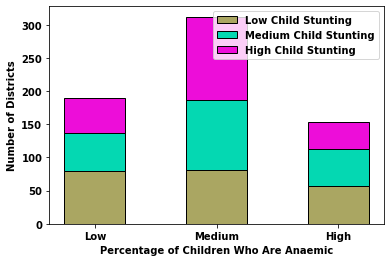

In [107]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,2,1]
 
# Names of group and bar width
names = ['Low','High','Medium' ]
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_4.png', bbox_inches='tight') 
# Show graphic
plt.show()





## 2.14 Clustering on the basis of 47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)

In [108]:
print(df_normalised.columns)
df_cluster_1 = df_normalised[['47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [109]:
print(cluster_centers)


[[-1.376922523444944], [-0.101603801363684], [1.084941704420424]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having low, medium and high % of children who are anaemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [110]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.22448979591836735
0.3741496598639456
0.4013605442176871
C1
0.24914675767918087
0.3515358361774744
0.3993174061433447
C2
0.5233644859813084
0.2803738317757009
0.19626168224299065


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of children receiving an adequate diet, 48.51% have 'high' stunting rates, and 16.92% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of children who are anaemic , 51.70% have low stunting rates and 12.82% have high stunting rates.




In [111]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

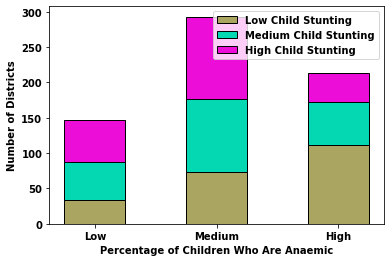

In [112]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2]
 
# Names of group and bar width
names = ['Low','Medium','High' ]
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_4.png', bbox_inches='tight') 
# Show graphic
plt.show()





## 2.15 Clustering on the basis of 10. Households using iodized salt (%)

In [113]:
print(df_normalised.columns)
df_cluster_1 = df_normalised[['10. Households using iodized salt (%)' ] ]
cluster_labels, cluster_centers = KMeansClustering(df_cluster_1, 3)
df_cluster_1['cluster labels'] = cluster_labels
df_cluster_1['68. Children under 5 years who are stunted11 (%)'] = stunting_discrete

Index(['District',
       '1. Population (female) age 6+ years who ever attended school (%)',
       '4. Sex ratio at birth for children born in the last five years (females per 1000 males)',
       '7. Households with an improved drinking-water source1 (%)',
       '8. Households using improved sanitation facility2 (%)',
       '9. Households using clean fuel for cooking3 (%)',
       '10. Households using iodized salt (%)',
       '12. Women who are literate (%)', '13. Men who are literate (%)',
       '14. Women with 10 or more years of schooling (%)',
       '15. Women age 20-24 years married before age 18 years (%)',
       '19. Any modern method (%)', '25. Total unmet need (%)',
       '30. Mothers who had at least 4 antenatal care visits (%)',
       '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
       '40. Institutional births (%)',
       '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%

C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Akshat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [114]:
print(cluster_centers)


[[-0.5351140002423906], [-2.360029719877278], [0.5530606160058159]]


**The cluster center values (centroids) indicate that the clusters 0 , 1 and 2 correspond to districts having  medium, low and high % of children who are anaemic**
<br>
**Now, for each cluster, let us see the proportion of districts that have high, low, and medium staunting (discrete values taken from  equal frequency discretised data)**

In [115]:
dfC0 = df_cluster_1[df_cluster_1['cluster labels']==1]
dfC1 = df_cluster_1[df_cluster_1['cluster labels']==2]
dfC2 = df_cluster_1[df_cluster_1['cluster labels']==3]

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


l = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC2.shape[0]
m = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC2.shape[0]
h = dfC2[dfC2['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC2.shape[0]
print("C2")
print(l)
print(m)
print(h)

C0
0.2206896551724138
0.2827586206896552
0.496551724137931
C1
0.3
0.2571428571428571
0.44285714285714284
C2
0.37585421412300685
0.3621867881548975
0.2619589977220957


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of children receiving an adequate diet, 48.51% have 'high' stunting rates, and 16.92% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of children who are anaemic , 51.70% have low stunting rates and 12.82% have high stunting rates.




In [116]:
df11=df_cluster_1.loc[df_cluster_1['cluster labels']==1]
dfc011=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='low']
dfc111=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc211=df11.loc[df11['68. Children under 5 years who are stunted11 (%)']=='high']

df21=df_cluster_1.loc[df_cluster_1['cluster labels']==2]
dfc021=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='low']
dfc121=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc221=df21.loc[df21['68. Children under 5 years who are stunted11 (%)']=='high']

df31=df_cluster_1.loc[df_cluster_1['cluster labels']==3]
dfc031=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='low']
dfc131=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='medium']
dfc231=df31.loc[df31['68. Children under 5 years who are stunted11 (%)']=='high']

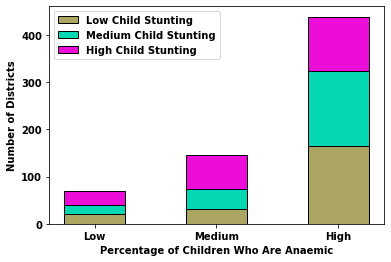

In [117]:
# ###############################STACKED BAR PLOT##########################################################
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [dfc011['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc021['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
         dfc031['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars2 = [dfc111['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc121['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc131['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]


bars3 = [dfc211['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc221['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean(),
        dfc231['68. Children under 5 years who are stunted11 (%)'].value_counts().values.mean()]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,0,2]
 
# Names of group and bar width
names = ['Medium', 'Low','High']
barWidth = 0.5
 
# Create brown bars
plt.bar(r, bars1, color='xkcd:khaki', edgecolor='black', width=barWidth, label='Low Child Stunting')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color= 'xkcd:aquamarine', edgecolor='black', width=barWidth, label='Medium Child Stunting')
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='xkcd:fuchsia', edgecolor='black', width=barWidth, label='High Child Stunting')
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Percentage of Children Who Are Anaemic", weight='bold')
plt.ylabel("Number of Districts",  weight='bold')
#plt.title("District clusters on the basis of \npercentage of households that use \nimproved drinking water sources",weight='bold')
plt.legend(loc=0, ncol=1)
plt.savefig('./../Plots/RESULT PLOTS/plot15_4.png', bbox_inches='tight') 
# Show graphic
plt.show()





## 2.15 Analysis on the basis of REGION

In [119]:
dfC0 = df_discrete[df_discrete['Region']=='Urban']
dfC1 = df_discrete[df_discrete['Region']=='Rural']

l,m,h=0,0,0

l = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC0.shape[0]
m = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC0.shape[0]
h = dfC0[dfC0['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC0.shape[0]
print("C0")
print(l)
print(m)
print(h)

l = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='low'].shape[0]/dfC1.shape[0]
m = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='medium'].shape[0]/dfC1.shape[0]
h = dfC1[dfC1['68. Children under 5 years who are stunted11 (%)']=='high'].shape[0]/dfC1.shape[0]
print("C1")
print(l)
print(m)
print(h)


C0
0.5714285714285714
0.33613445378151263
0.09243697478991597
C1
0.2803738317757009
0.33271028037383177
0.38691588785046727


**It is clear of all the points that belong to cluster 1 (corresponding to 'high' % of children receiving an adequate diet, 48.51% have 'high' stunting rates, and 16.92% have 'low' stunting rates. Of all the districts belonging to cluster 2(corresponding to 'low' % of children who are anaemic , 51.70% have low stunting rates and 12.82% have high stunting rates.




# 3. Association Rule Mining to identify factors that affect child stunting

In [121]:
df_apriori = pd.read_csv('./../Data/working_data/equal_frequency_discretised_data_6.csv')
df_apriori.drop(df_apriori.columns[[0]], axis = 1, inplace = True) 
# df_apriori = df_apriori[['1. Population (female) age 6+ years who ever attended school (%)' , 
#  '8. Households using improved sanitation facility2 (%)' , 
#  '9. Households using clean fuel for cooking3 (%)' ,
#  '12. Women who are literate (%)',
#  '13. Men who are literate (%)' , 
#  '62. Children under age 3 years breastfed within one hour of birth8 (%)',
#  '65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)',
#  '67. Total children age 6-23 months receiving an adequate diet9 10 (%)',
#  '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%)',
#  '76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)',
#  '79. All women age 15-49 years who are anaemic (%)',
#  '14. Women with 10 or more years of schooling (%)',
#  '15. Women age 20-24 years married before age 18 years (%)',
#  '19. Any modern method (%)',
#  '30. Mothers who had at least 4 antenatal care visits (%)',
#  '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%)',
#  '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)',
#                          '68. Children under 5 years who are stunted11 (%)'
#                         ]]

In [61]:
# df_apriori = df_apriori.drop(columns = ['1. Population (female) age 6+ years who ever attended school (%)' , '14. Women with 10 or more years of schooling (%)','65. Breastfeeding children age 6-23 months receiving an adequate diet9 10 (%)' ,'76. Children age 6-59 months who are anaemic (<11.0 g/dl) (%)', '79. All women age 15-49 years who are anaemic (%)','30. Mothers who had at least 4 antenatal care visits (%)' , '47. Children age 12-23 months fully immunized (BCG measles and 3 doses each of polio/DPT) (%)'])

In [122]:
cols = df_apriori.columns
df_apriori = df_apriori.values
df_apriori = df_apriori.tolist()

## 3.1 Conversion of categorical attributes into a suitable input for association rule mining (assymetric binary attributes)

each attribute will be converted from attribute_name to attribute_name - low , attribute_name - med , attribute_name - high

In [123]:
for row in df_apriori:
  for i in range(len(row)):
    row[i] = cols[i] + ' ' + row[i]

## 3.2 Implementation of Association Rule Mining (Using Apriori Algorithm)

In [124]:
# Functions to perform associarion rule mining
def GetRecords(dfApriori):

  for listt in dfApriori:
      recordToYield = frozenset(listt)  
      yield recordToYield

dfApriori = df_apriori
records_ = GetRecords(dfApriori)
print(type(records_))
print(records_)

import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
   
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
       
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
   
    itemSet, transactionList = getItemSetTransactionList(data_iter)
    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules
    #C-1 itemset
    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)
    #freq-1 itemset
    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            return float(freqSet[item])/len(transactionList)

            
#largeSet dict contains the freq Itemsets
    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items():
      if not key==0:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


<class 'generator'>
<generator object GetRecords at 0x0000022DD7C7AB48>


**We mined association rules which satisfied a support threshold of 0.15 and confidence threshold of 0.6**

In [125]:
items_, rules_ = runApriori(records_, 0.15, 0.60)


## 3.3 Frequent Itemsets (Support > 0.15) containing the attribute '% of Children under 5 years who are stunted- high'

In [126]:
for complete_tuple in items_:
    itemset = complete_tuple[0]
    if('68. Children under 5 years who are stunted11 (%) high' in itemset):
        print(complete_tuple)
        print("\n\n")

(('68. Children under 5 years who are stunted11 (%) high',), 0.3333333333333333)



(('68. Children under 5 years who are stunted11 (%) high', '8. Households using improved sanitation facility2 (%) low'), 0.21865443425076453)



(('68. Children under 5 years who are stunted11 (%) high', '72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%) high'), 0.20795107033639143)



(('68. Children under 5 years who are stunted11 (%) high', '32. Mothers who consumed iron folic acid for 100 days or more when they were pregnant (%) low'), 0.18501529051987767)



(('68. Children under 5 years who are stunted11 (%) high', '13. Men who are literate (%) low'), 0.18807339449541285)



(('68. Children under 5 years who are stunted11 (%) high', '1. Population (female) age 6+ years who ever attended school (%) low'), 0.20489296636085627)



(('68. Children under 5 years who are stunted11 (%) high', 'Region Rural'), 0.3165137614678899)



(('68. Children under 5 years who are stunted11

## 3.4 Association Rules (Confidence > 0.6) containing the attribute '% of Children under 5 years who are stunted- high' as its consequent (post condition)

In [127]:
for complete_tuple in rules_:
    rule = complete_tuple[0]
    antecedent = rule[0]
    consequent = rule[1] 
    if('68. Children under 5 years who are stunted11 (%) high' in consequent and len(consequent)==1):
        print(str(antecedent)+' ---> '+str(consequent))
        conf = complete_tuple[1]
        print('CONFIDENCE is: '+str(conf))
        print("\n\n")

('8. Households using improved sanitation facility2 (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6559633027522936



('72. Women whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%) high',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6238532110091743



('1. Population (female) age 6+ years who ever attended school (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6146788990825689



('74. Women who are overweight or obese (BMI >=25.0 kg/m2) (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6055045871559633



('12. Women who are literate (%) low',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: 0.6330275229357799



('73. Men whose Body Mass Index (BMI) is below normal (BMI <18.5 kg/m2) (%) high',) ---> ('68. Children under 5 years who are stunted11 (%) high',)
CONFIDENCE is: